In [1]:
import os
import cv2
import numpy as np
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential

## Load and preprocess dataset

In [2]:
Datasetpath= 'B:/task4_ProdigyInfotech/archive/leapGestRecog'

In [4]:
labels =[]
images = []

for subject in os.listdir(Datasetpath):
    subject_folder = os.path.join(Datasetpath , subject)

    for gesture in os.listdir(subject_folder):
        gesture_folder = os.path.join(subject_folder,gesture)
        
        for image_file in os.listdir(gesture_folder):
            image_path = os.path.join(gesture_folder, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64,64))
            image= image/255.0
            images.append(image)
            labels.append(gesture)
        
            
images =np.array(images)   

   

done


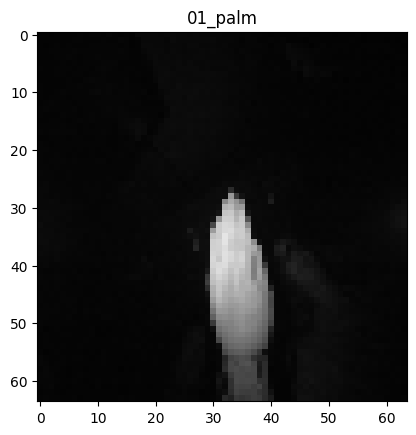

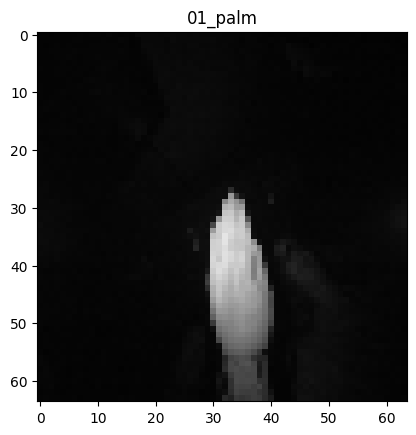

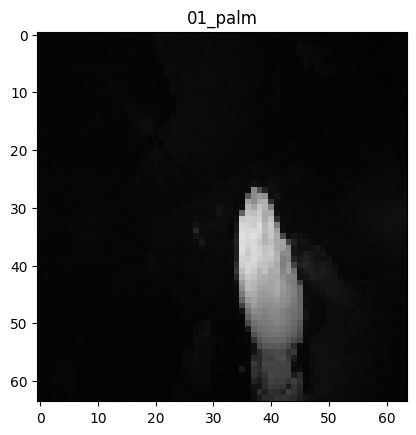

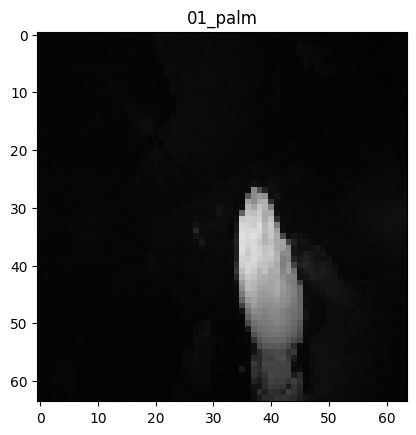

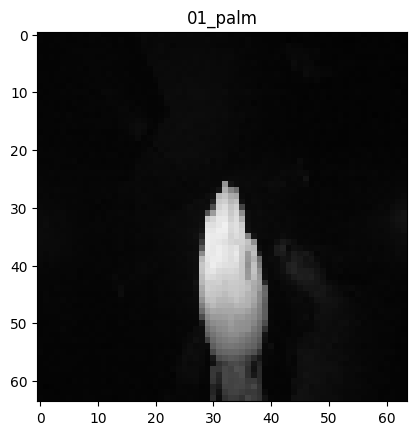

In [28]:
import matplotlib.pyplot as plt
sample= [1,2,3,4,5]
for index in sample:
    image= images[index]
    label=labels[index]
    plt.imshow(image)
    plt.title(label)
    plt.show()





In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(images,labels)

In [7]:

laber_encoder= LabelEncoder()
y_train_encod= laber_encoder.fit_transform(ytrain)
y_test_encod= laber_encoder.transform(ytest)
y_train_onehot= to_categorical(y_train_encod)
y_test_onehot= to_categorical(y_test_encod)

### CNN model Training for Gesture Recognition

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(xtrain, y_train_onehot, validation_data=(xtest, y_test_onehot), epochs=10, batch_size=32)


Epoch 1/10
469/469 [==============================] - 109s 205ms/step - loss: 0.2370 - accuracy: 0.9282 - val_loss: 0.0171 - val_accuracy: 0.9954
Epoch 2/10
469/469 [==============================] - 92s 195ms/step - loss: 0.0106 - accuracy: 0.9979 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 3/10
469/469 [==============================] - 91s 195ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 4/10
469/469 [==============================] - 89s 191ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0705 - val_accuracy: 0.9802
Epoch 5/10
469/469 [==============================] - 88s 188ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 6/10
469/469 [==============================] - 89s 189ms/step - loss: 3.5217e-05 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 7/10
469/469 [==============================] - 93s 199ms/step - loss: 1.6842e-05 - accuracy: 1.0000 - val_loss: 0.0017

### Evaluation Model

In [19]:
loss , accuracy = model.evaluate(xtest,y_test_onehot)


157/157 [==============================] - 8s 52ms/step - loss: 0.0016 - accuracy: 0.9998
Loss is 'loss' and accuracy is 'accuracy


In [22]:
print(f"Loss is {loss} and accuracy is {accuracy}")

Loss is 0.0016094392631202936 and accuracy is 0.9998000264167786
